In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [11]:
# Baseline parameters
omgM0 = 0.298
M_b0 = -19.3
alpha0 = 0.154 # 0.156 for C11
beta0 = 3.030 # 3.69 for C11
gamma0 = 0.053 # 0.054 for C11
m_step = 10.13
tau = 0.001

In [12]:
# Distance modulus for the observational data
def muexp(mb, x1, color, Mstell, delta_b):
    mu=[]
    mub = []
    for i in range(len(mb)):
        delta_M = gamma0 / (1 + np.exp(-(Mstell[i]-m_step)/tau))
#         delta_b = delta_mb[i] - beta0*delta_c[i] + alpha0*delta_x1[i]
        mu.append(mb[i] - M_b0 + alpha0*x1[i] - beta0*color[i] + delta_M - delta_b[i])
    return mu

In [13]:
if __name__=='__main__':
    
    # Read Pantheon data
    filename_G10 = '../data/hlsp_ps1cosmo_panstarrs_gpc1_all_model_v1_ancillary-g10.fitres'
#     filename_C11 = '../data/hlsp_ps1cosmo_panstarrs_gpc1_all_model_v1_ancillary-c11.fitres'

    SNdata = pandas.read_csv(filename_G10, comment='#', skiprows=6, header=0, delimiter=r"\s+")

    sn_name = SNdata['CID']
    zcmb = SNdata['zCMB']
    zhel = SNdata['zHD']
    mb = SNdata['mB']
    dmb = SNdata['mBERR']
    x1 = SNdata['x1']
    dx1 = SNdata['x1ERR']
    color = SNdata['c']
    dcolor = SNdata['cERR']
    Mstell = SNdata['HOST_LOGMASS']
    mu = SNdata['MU']
    mu_model = SNdata['MUMODEL']
    mu_err = SNdata['MUERR']
    mu_res = SNdata['MURES']
    dataset = SNdata['IDSAMPLE']
    delta_mb = SNdata['biasCor_mB'] 
    delta_c = SNdata['biasCor_c'] 
    delta_x1 = SNdata['biasCor_x1'] 
    delta_b = SNdata['biasCor_mu']

In [14]:
# Calculate distance modulus from eq. 3 Pantheon paper
SNdata['mu_exp'] = muexp(mb, x1, color, Mstell, delta_b)
mu_exp = SNdata['mu_exp']

In [15]:
# Comparison of two distance modulus
setNB = dataset==0
setSDSS = dataset==2
setSNLS = dataset==3
setPS1 = dataset==1
setHST = dataset==4

x0 = np.linspace(0.001, 2.2, 1000)
y0 = np.zeros(len(x0))

fig = plt.figure(figsize=[8,8])
P1, P2 = fig.subplots(2, 1, sharex=True, sharey=False, gridspec_kw=dict(height_ratios=[3,1]))
fig.subplots_adjust(hspace=0)

# Plot for mu calculated from G10 mb,x1,c,M_st,db parameters and baseline cosmology from Pantheon analysis
P1.plot(zcmb, mu_exp, marker='.', color="black", linestyle="None")

# Plot for mu taken directly from G10
P1.errorbar(zcmb[setNB], mu[setNB], yerr=mu_err[setNB], marker='.', color="red", linestyle="None", 
            ecolor="red", label='Low-z')
P1.errorbar(zcmb[setSDSS], mu[setSDSS], yerr=mu_err[setSDSS], marker='.', color="green", linestyle="None", 
            ecolor="green", label='SDSS')
P1.errorbar(zcmb[setSNLS], mu[setSNLS], yerr=mu_err[setSNLS], marker='.', color="grey", linestyle="None", 
            ecolor="grey", label='SNLS')
P1.errorbar(zcmb[setPS1], mu[setPS1], yerr=mu_err[setPS1], marker='.', color="blue", linestyle="None", 
            ecolor="blue", label='PS1')
P1.errorbar(zcmb[setHST], mu[setHST], yerr=mu_err[setHST], marker='.', color="m", linestyle="None", 
            ecolor="m", label='High-z')



P2.errorbar(zcmb[setNB], mu_res[setNB], yerr=mu_err[setNB], marker='.', color="red", linestyle="None", 
            ecolor="red")
P2.errorbar(zcmb[setSDSS], mu_res[setSDSS], yerr=mu_err[setSDSS], marker='.', color="green", linestyle="None", 
            ecolor="green")
P2.errorbar(zcmb[setSNLS], mu_res[setSNLS], yerr=mu_err[setSNLS], marker='.', color="grey", linestyle="None", 
            ecolor="grey")
P2.errorbar(zcmb[setPS1], mu_res[setPS1], yerr=mu_err[setPS1], marker='.', color="blue", linestyle="None", 
            ecolor="blue")
P2.errorbar(zcmb[setHST], mu_res[setHST], yerr=mu_err[setHST], marker='.', color="m", linestyle="None", 
            ecolor="m", label='High-z')
P2.plot(x0, y0, c="black", label="$\Lambda$CDM fit")

# plot settings
P1.set_ylabel(r'Distance Modulus $\mu = m_B - M_B + \alpha x_1 - \beta c + \Delta_M - \Delta_B$')  
P1.set_xscale('log')
P1.set_ylim(33, 47)
P1.legend(loc='best', shadow=True, fontsize='x-large')
P2.set_xlabel('z')
P2.set_ylabel(r'Hubble Res. (mag)')  
P2.set_xscale('log')
P2.set_xlim(8e-3, 2.3)
P2.set_ylim(-1.3, 1)

plt.savefig('HD.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


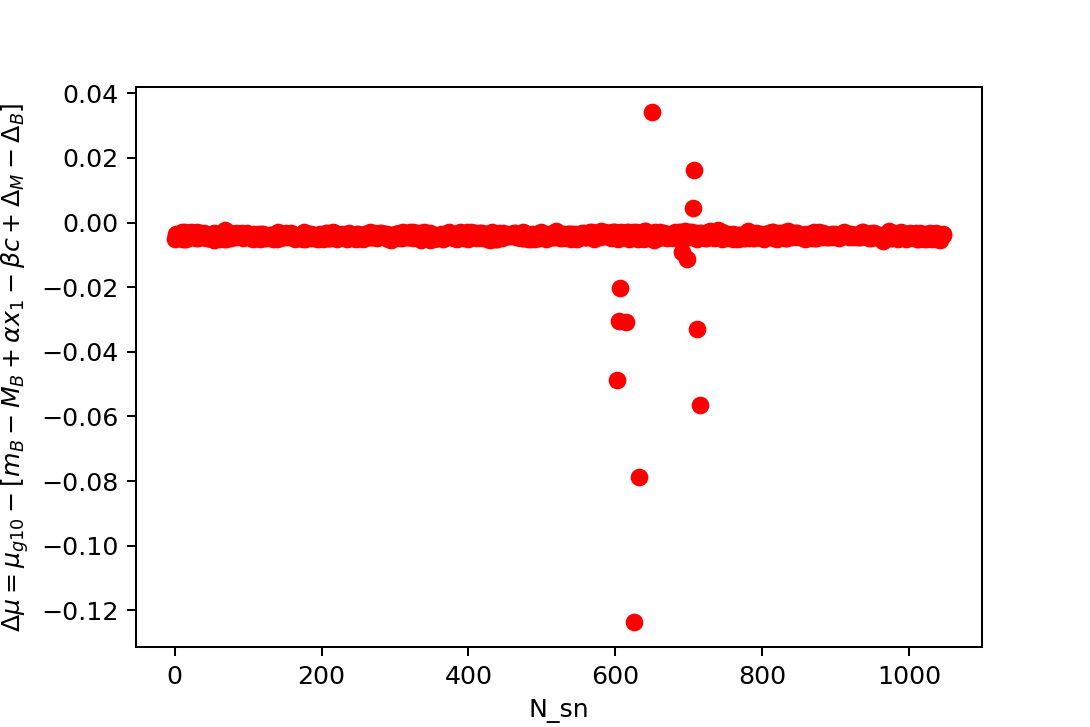

Text(0,0.5,'$\\Delta\\mu = \\mu_{g10} - [m_B - M_B + \\alpha x_1 - \\beta c + \\Delta_M - \\Delta_B]$')

In [7]:
# Diff plot
diff = mu_exp - mu

fig = plt.figure(figsize=[6,4])
ax  = fig.add_subplot(111)
ax.plot(diff, 'ro')
ax.set_xlabel("N_sn")
ax.set_ylabel(r'$\Delta\mu = \mu_{g10} - [m_B - M_B + \alpha x_1 - \beta c + \Delta_M - \Delta_B]$')

plt.savefig('diff_g10.png')

In [16]:
diff = mu_exp - mu

for i,j in zip(diff,sn_name):
    if abs(i) > 0.005:
        print(j,i)

2005hc -0.03509181660000138
2005ki -0.020593291000011504
2005lu -0.03096139780583229
2006ax -0.014461240999992242
2006hb -0.1022621139999984
2006ob -0.06490846860000232
2007A 0.028743120999997984
2004ef -0.009750873999998078
2005eq -0.006467901999997139
2006et 0.0055058000000016705
2006ev 0.02893312699999484
2007nq -0.0221546319999959
2008hv -0.0410493090000017


<IPython.core.display.Javascript object>


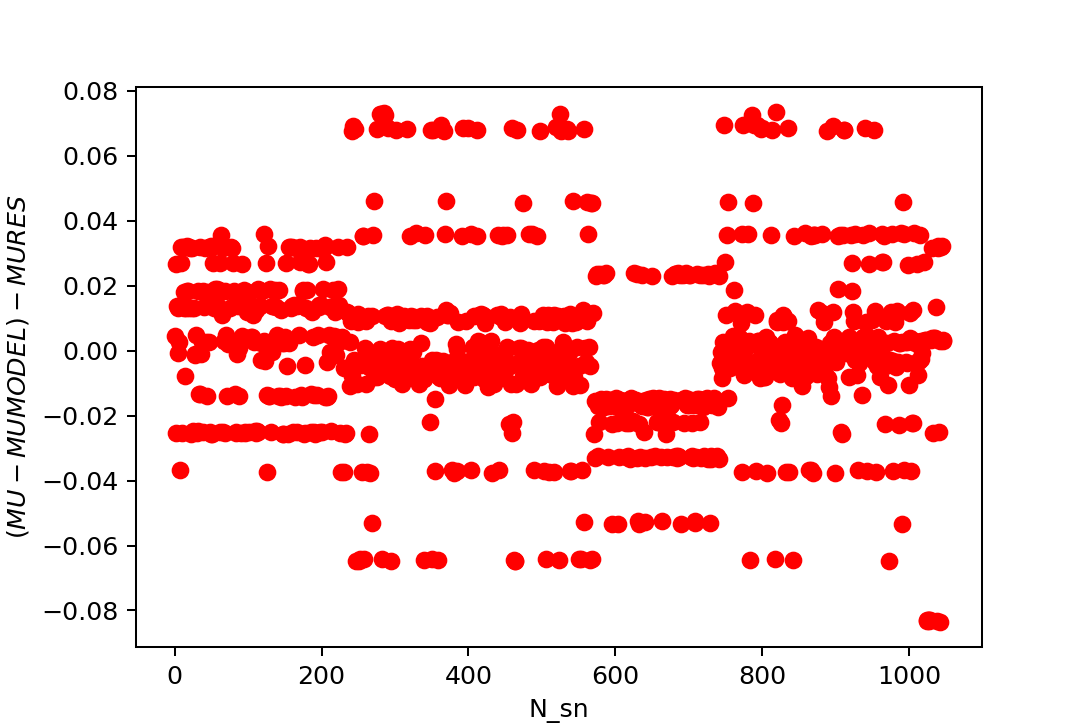

In [9]:
# Diff plot for residuals
hd_res = SNdata['MU'] - SNdata['MUMODEL']

fig = plt.figure(figsize=[6,4])
ax  = fig.add_subplot(111)
ax.plot(hd_res - mu_res, 'ro')
ax.set_xlabel("N_sn")
ax.set_ylabel(r'$(MU-MUMODEL) - MURES$')

plt.savefig('diff_mu.png')